<a href="https://colab.research.google.com/github/xguan3/Shopify_DS_Challenge/blob/main/Shopify_2022_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sys 
sys.path.append('/content/drive/MyDrive/2022/')
df = pd.read_csv('/content/drive/MyDrive/2022/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')


## Section 1: Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


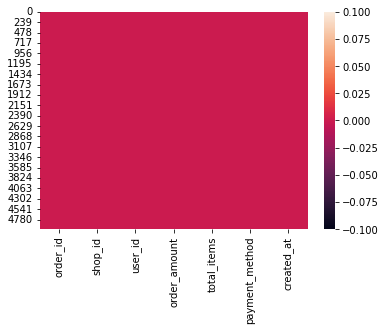

In [ ]:
sns.heatmap(df.isnull())
#sns.heatmap(df.isnull(),cbar=False,yticklabels=False)



####Dataset has no missing values.
####If there were any, we would've noticed in figure represented by different colour shade on purple background.


#### To check out correlation

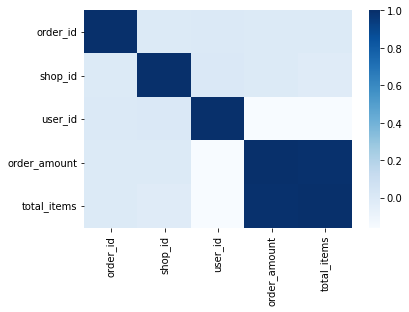

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 


#### To check outliers


In [ ]:
l = df.columns.values
print(l)

['order_id' 'shop_id' 'user_id' 'order_amount' 'total_items'
 'payment_method' 'created_at']


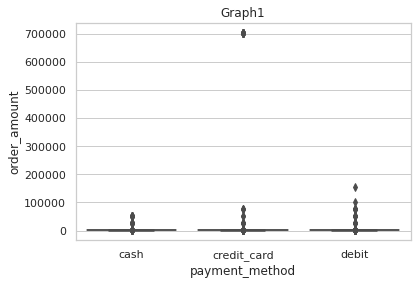

In [ ]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["payment_method"], y=df["order_amount"]).set_title('Graph1')

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df['order_amount'].describe()


count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

#### After our EDA, we can now start with our resolutions to this analysis problem


In [ ]:
#Filter necessary columns for analysis
df_s1 = df.copy()
df_s1 = df_s1[['shop_id', 'order_amount', 'total_items']]
#Scale purchases to give even weight to total_items
df_s1['orders_per_item'] = df_s1['order_amount'] / df_s1['total_items']
#Now we have a column that represents order amount spent, if each customer only bought one item
df_s1.head()


,shop_id,order_amount,total_items,orders_per_item
4995,73,330,2,165.0
4996,48,234,2,117.0
4997,56,351,3,117.0
4998,60,354,2,177.0
4999,44,288,2,144.0


#### Then we calculate average order value for the order_per_item column 

In [ ]:
np.mean(df_s1['orders_per_item'])


387.7428

#### The average looks too high comparing to orders_per_item column therefore we need to check which store has overpricing

In [ ]:
df_s1.groupby(df_s1['shop_id'])['orders_per_item'].mean().reset_index().sort_values(by=['orders_per_item'], ascending = False).head()


,shop_id,orders_per_item
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


#### We noticed that shop 78 is over priced and it caused the average too high.

In [ ]:
avg_shoe = np.mean(df_s1[df_s1['shop_id'] != 78]['orders_per_item'])
print('Our shoes are affordable with a price of ${0:.2f}'.format(avg_shoe))

Our shoes are affordable with a price of $152.48


#### Our shoes are afforable with a $152.48 per pair among 99 stores.

## Section 2: Remove anomalies and re-evaluate average order value


Text(0, 0.5, 'Count')

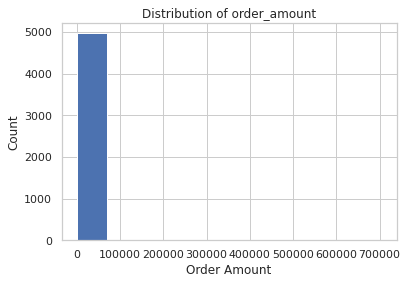

In [ ]:
df_s2 = df.copy()

plt.hist(df_s2['order_amount'])
plt.title('Distribution of order_amount')
plt.xlabel('Order Amount')
plt.ylabel('Count')


#### Note shop 78 had issues but we will filter it out later

In [ ]:
df_s2['total_items'].value_counts()


2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

#### We would like to know a count of total items of each store and we noticed there is one store has 2000 pairs of sneakers sold.  We need to look into why it that. 

In [ ]:
df_s2[df_s2['total_items'] == 2000]['shop_id'].unique()


array([42])

In [ ]:
df_s2 = df_s2[['shop_id', 'user_id', 'order_amount', 'total_items']]


,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
40,42,793,352,1
60,42,607,704000,2000
308,42,770,352,1
409,42,904,704,2


In [ ]:
df_s2[df_s2['user_id'] == 607].head()


,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
60,42,607,704000,2000
520,42,607,704000,2000
1104,42,607,704000,2000
1362,42,607,704000,2000


#### It looks like store 42 could cause a high average per order. I will remove store 42 and 78 next. 

In [ ]:
filtered_dataset = df[(df['shop_id'] != 42) & (df['shop_id'] != 78)]
# Average amount per order
np.mean(filtered_dataset['order_amount'])
300.1558229655313
# Average items per order
#np.mean(filtered_dataset['total_items'])

300.1558229655313

#### We can see the average dollar spent per order is around $300 and each consumers purchase more than 1 order per visit. 

In [ ]:
df_s3 = df.copy()


## Section 3: New metrics

In [ ]:
df_s3['order_amount'].describe().to_frame().round(2)


,order_amount
count,5000.00
mean,3145.13
std,41282.54
min,90.00
25%,163.00
50%,284.00
75%,390.00
max,704000.00


#### We can also use percentile to understand how anomalies affect our conclusion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


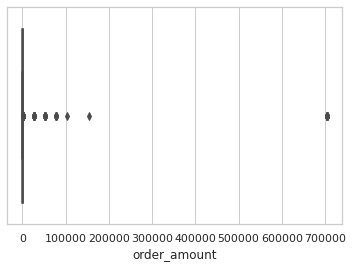

In [ ]:
sns.boxplot(df_s3['order_amount'])


In [ ]:
df_s3['z_score'] = (df_s3['order_amount'] - 3145.13) / 41282.54
df_s3['z_score'] = df_s3['z_score'].round(3)
df_s3[df_s3['z_score'] > 0].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,z_score
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,16.977
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,16.977
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,0.547
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,1.170
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,1.170
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,1.170
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,16.977
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,1.170
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,3.663
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,0.547


#### From previous sections, we know store 42 and 78 caused issues with a high average order value. We want to see if we can find a hint from percentile with a z-score > 0.1


In [ ]:
df_s3[df_s3['z_score'] >0.1]['shop_id'].unique()

array([42, 78])

#### This has a same conclusion with the previous sections therefore we can see that store 78 and 42 are the outliers and it caused a high average order value. 